## KNN - Financial Features Only 

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np

#from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from visualize import generate_moons_df, preprocess, plot_boundaries

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [2]:
model_0 = pd.read_pickle('model_financial.pickle')
model_0

,id,poverty,homeowner,fin_assets_30,debts_30,income_wage_compiled,income_bus_compiled
0,4,1.79,0,0,0,4,0
1,5,8.71,1,144000,9000,6,0
2,6,2.26,0,3500,1000,3,0
3,10,9.06,0,185000,96500,5,0
4,11,3.99,0,3000,62500,4,0
...,...,...,...,...,...,...,...
3773,9013,1.40,0,1750,0,3,0
3774,9015,3.25,1,88176,55464,5,0
3775,9018,3.27,0,100,1200,3,0
3776,9019,4.98,0,400,17000,4,0


In [3]:
features = ['poverty', 'fin_assets_30', 'debts_30', 'income_wage_compiled', 'income_bus_compiled']

X = model_0.loc[:, features]
y = model_0['homeowner']

In [4]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=3)

### Neighbors = 5

In [5]:
#set up KNN
neighbors = 5
knn_5 = KNeighborsClassifier(n_neighbors= neighbors )

#Scale data
ss = StandardScaler()
#fit transform X train
X_train_scaled = ss.fit_transform(X_train)
#fit X val
X_val_scaled = ss.transform(X_val)

#fit the X train on KNN
knn_5.fit(X_train_scaled, y_train)

print(f'knn TRAIN accuracy: {knn_5.score(X_train_scaled, y_train):.5f}')
print(f'knn VAL accuracy: {knn_5.score(X_val_scaled, y_val):.5f}')

knn TRAIN accuracy: 0.79539
knn VAL accuracy: 0.69021


In [6]:
y_preds = knn_5.predict(X_val_scaled)

print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       413
           1       0.54      0.50      0.52       210

    accuracy                           0.69       623
   macro avg       0.65      0.64      0.65       623
weighted avg       0.68      0.69      0.69       623



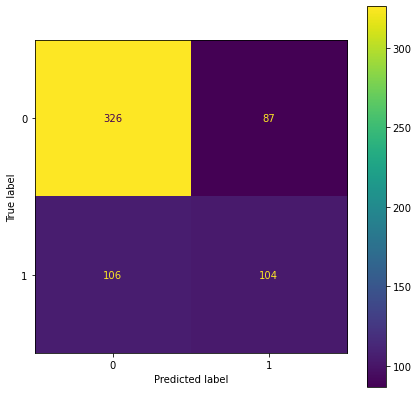

In [7]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(knn_5, X_val_scaled, y_val, ax=ax);

Compared to our linear regression model, we're seeing **fewer false negatives** and **more true positives**. \
However, we are also seeing **more false positives** and **fewer true negatives**
#### We have lowered our threshold, thus trading precision for recall, and recall v precision is nicely balanced here, as indicated by our f1 score

### Finding optimal n neighbors

In the above model, we chose a random number for n neighbors, but let's plot out the optimal N value for accuracy

Maximum accuracy: 0.7174959871589085 at K = 19


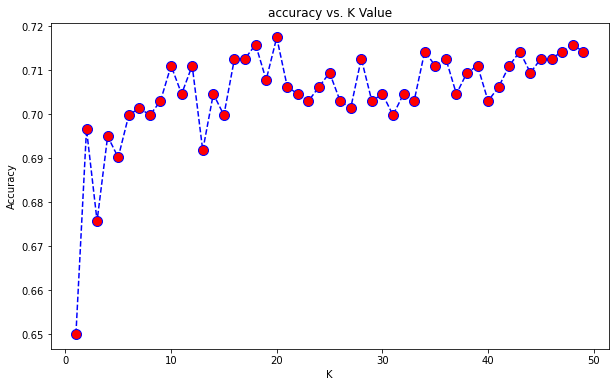

In [56]:
acc = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    acc.append(knn.score(X_val_scaled, y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))

Let's test out our optimal accuracy at n= 19 with a new model:

### Neighbors = 19

In [13]:
#set up KNN
optimal = 19
knn = KNeighborsClassifier(n_neighbors= optimal )

#Scale data
ss = StandardScaler()
#fit transform X train
X_train_scaled = ss.fit_transform(X_train)
#fit X val
X_val_scaled = ss.transform(X_val)

#fit the X train on KNN model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=19)

In [14]:
y_preds = knn.predict(X_val_scaled)

print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       413
           1       0.59      0.45      0.51       210

    accuracy                           0.71       623
   macro avg       0.67      0.65      0.65       623
weighted avg       0.70      0.71      0.70       623



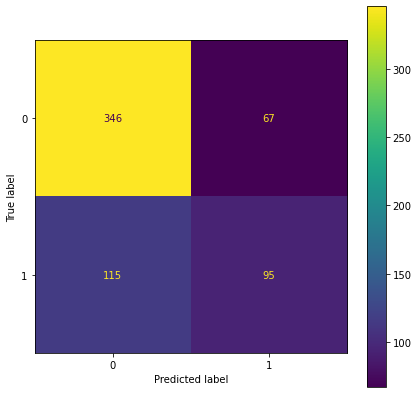

In [15]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(knn, X_val_scaled, y_val, ax=ax);



#### Test

In [17]:
#set up KNN
optimal = 19
knn = KNeighborsClassifier(n_neighbors= optimal)

#Scale data
ss = StandardScaler()
#fit transform X train-val
X_train_val_scaled = ss.fit_transform(X_train_val)
#fit X test
X_test_scaled = ss.transform(X_test)

#fit the X train-val on KNN model
knn.fit(X_train_val_scaled, y_train_val)

KNeighborsClassifier(n_neighbors=19)

In [18]:
y_preds = knn.predict(X_test_scaled)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       400
           1       0.65      0.54      0.59       223

    accuracy                           0.73       623
   macro avg       0.70      0.69      0.69       623
weighted avg       0.72      0.73      0.72       623



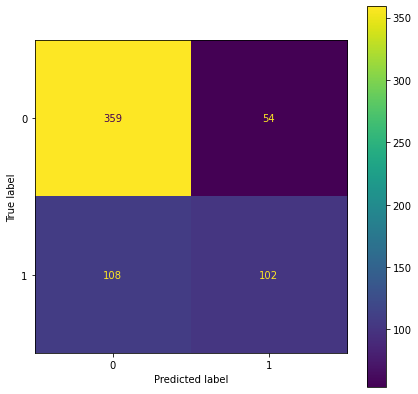

In [19]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(knn, X_val_scaled, y_val, ax=ax);

Compared to our k = 5 model, we're seeing **fewer true positives** and **more false negatives**. \
However, we are also seeing **fewer false positives** and **more true negatives**
#### We have raised our threshold, thus trading recall for precision, and so our f1 score is no longer as balanced as our k = 5 model, but still better than our logistic regression model

<Figure size 1080x1080 with 0 Axes>

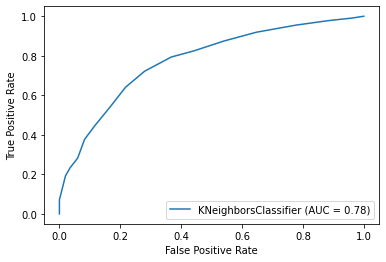

In [20]:
plt.figure(figsize=(15, 15))
plot_roc_curve(knn, X_test_scaled, y_test)
plt.show();

#### Our ROC and AUC are not as good as the logistic regression model

### Testing K = 5

K = 5 is our best model currently based on our validation tests Let's test it.

In [8]:
#set up KNN 
neighbors = 5
knn_5 = KNeighborsClassifier(n_neighbors= neighbors )

#Scale data
ss = StandardScaler()
#fit transform X train-val
X_train_val_scaled = ss.fit_transform(X_train_val)
#fit X test
X_test_scaled = ss.transform(X_test)

#fit the X train-val on KNN model
knn_5.fit(X_train_val_scaled, y_train_val)

print(f'knn TRAIN-VAL accuracy: {knn_5.score(X_train_val_scaled, y_train_val):.5f}')
print(f'knn TEST accuracy: {knn_5.score(X_test_scaled, y_test):.5f}')

knn TRAIN-VAL accuracy: 0.78795
knn TEST accuracy: 0.70787


In [9]:
y_test_preds = knn_5.predict(X_test_scaled)

print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       400
           1       0.59      0.59      0.59       223

    accuracy                           0.71       623
   macro avg       0.68      0.68      0.68       623
weighted avg       0.71      0.71      0.71       623



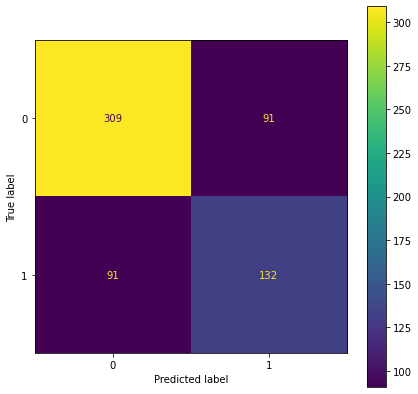

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(knn_5, X_test_scaled, y_test, ax=ax);

Our test looks even better than our validation round!

<Figure size 1080x1080 with 0 Axes>

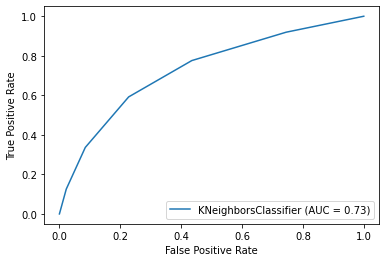

In [12]:
plt.figure(figsize=(15, 15))
plot_roc_curve(knn_5, X_test_scaled, y_test)
plt.show();

#### Compared to our logistic regression model (in Model- Logistic Regression notebook), KNN's ROC and AUC doesn't plot as well. This is good to know.

In [33]:
X_test_pred_df = X_test.copy()

In [48]:
#add in new column for our predictions
X_test_pred_df['homeowner_pred'] = y_test_preds
#add back in our actual Y values
X_test_pred_df.join(y_test)


In [65]:
#X_test_pred_df

In [63]:
false_positives = X_test_pred_df[(X_test_pred_df['homeowner_pred'] == 1) & (X_test_pred_df['homeowner'] == 0)]
false_positives.describe()

,poverty,fin_assets_30,debts_30,income_wage_compiled,income_bus_compiled,homeowner_pred,homeowner
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,91.0
mean,5.216154,28077.252747,22661.197802,4.593407,0.197802,1.0,0.0
std,4.512615,33648.393253,21712.124598,0.930687,0.819482,0.0,0.0
min,0.910000,0.000000,0.000000,2.000000,0.000000,1.0,0.0
25%,2.815000,3700.000000,5000.000000,4.000000,0.000000,1.0,0.0
50%,4.120000,17060.000000,15600.000000,5.000000,0.000000,1.0,0.0
75%,5.700000,37200.000000,37000.000000,5.000000,0.000000,1.0,0.0
max,23.030000,160000.000000,100000.000000,6.000000,5.000000,1.0,0.0


In [64]:
false_negatives = X_test_pred_df[(X_test_pred_df['homeowner_pred'] == 0) & (X_test_pred_df['homeowner'] == 1)]
false_negatives.describe()

,poverty,fin_assets_30,debts_30,income_wage_compiled,income_bus_compiled,homeowner_pred,homeowner
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,91.0
mean,4.215385,26920.901099,22736.263736,3.978022,0.153846,0.0,1.0
std,4.117312,52799.543059,35071.895258,1.192365,0.681878,0.0,0.0
min,0.050000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,2.440000,2250.000000,0.000000,4.000000,0.000000,0.0,1.0
50%,3.330000,9500.000000,10000.000000,4.000000,0.000000,0.0,1.0
75%,4.350000,23750.000000,29000.000000,5.000000,0.000000,0.0,1.0
max,23.030000,300000.000000,206000.000000,7.000000,4.000000,0.0,1.0


We have an **equal number of false positives and false negatives.** 
There also aren't large differences in the  means for each feature column for both sets, though there are higher standard deviations for false negatives in the fin_assets_30, debts_30, and income_wage categories. 

**We need to add more features in order to improve our model.** We already have several demographic and geographic features on hand, which will be our next step!